# Predicting the House Price

brief description

## 0. Import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

## 1. Importing the data

### 1-1. Importing the data

In [3]:
# importing data

df_original= pd.read_csv('data/regression_data.csv')

### 1-2. Getting overview of the data

In [4]:
df_original.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [6]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [7]:
df_original.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

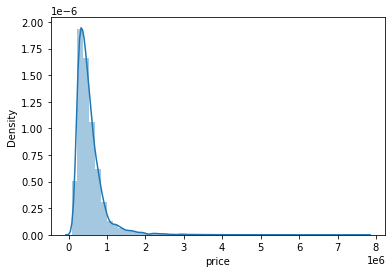

In [8]:
# distribution of some general variables

sns.distplot(df_original['price'])
plt.show()

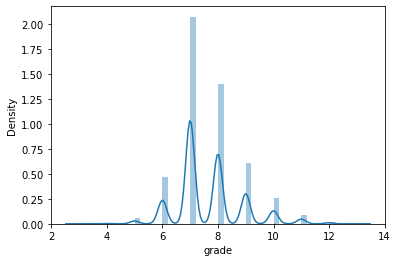

In [10]:
sns.distplot(df_original['grade'])
plt.show()

## 2. Cleaning (changing column type)

In [15]:
df_original.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [17]:
df_original['id'].value_counts()

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
7167000040    2
7409700215    2
5101402435    2
2044500213    2
2422049104    2
8832900780    2
7387500235    2
9136103130    2
8564860270    2
1446403850    2
8129700644    2
2231500030    2
2019200220    2
3323059027    2
9809000020    2
9834200305    2
5536100020    2
1954420170    2
7657000540    2
251300110     2
6141100320    2
726049190     2
8945100320    2
9222400605    2
1219000473    2
5083000375    2
3432501415    2
6381500170    2
4305200070    2
2726049071    2
8910500150    2
302000375     2
7856400240    2
8062900070    2
5332200530    2
3303000130    2
5132000140    2
5054800110    2
5249801440    2
4302201085    2
6751300375    2
2212200100    2
2787460720    2
2023049218    2
1523049207    2
7972000010    2
2621600015    2
4139480200    2
4443800385    2
1254200015    2
1630700361    2
7524400250    2
6669020290    2
1232000810    2
6117501820    2
1788800630    2
9250900104    2
12502011

In [18]:
df = df_original.drop_duplicates()
df.shape

(21597, 21)

## 3. EDA

### 3-1. Checking distributions

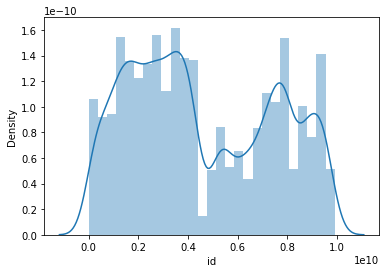

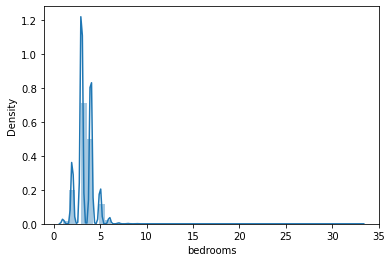

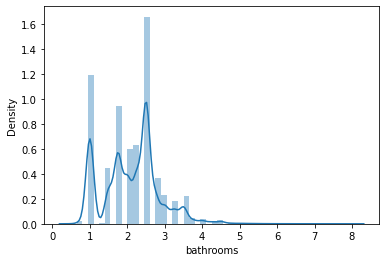

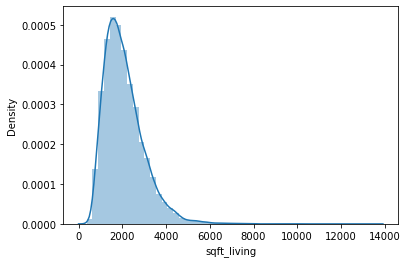

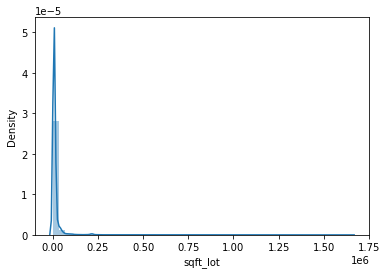

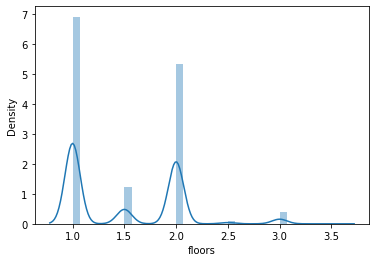

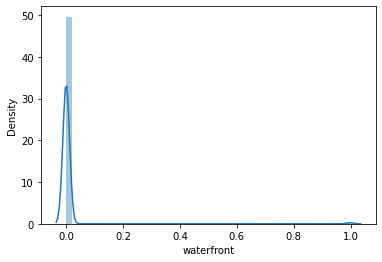

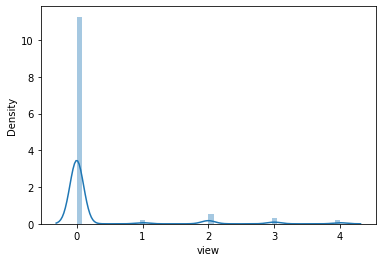

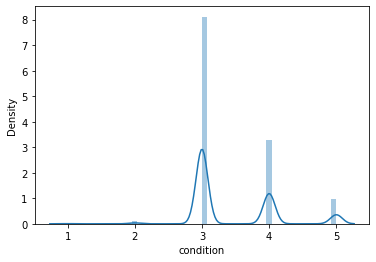

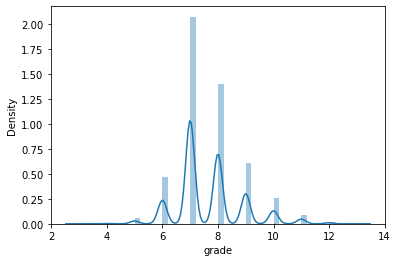

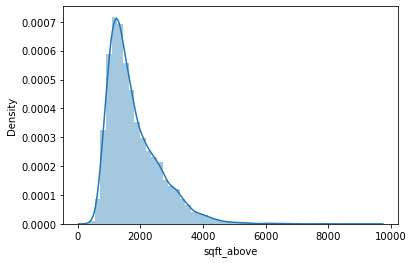

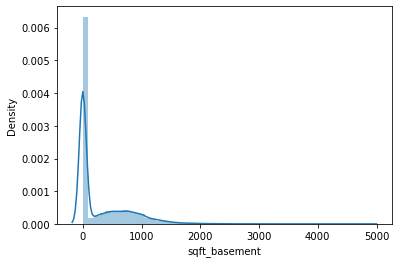

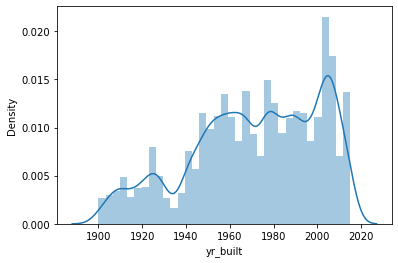

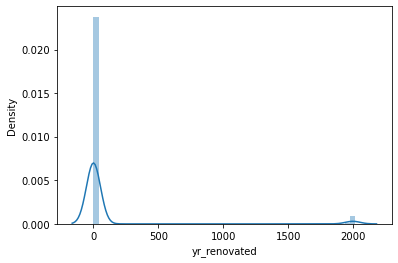

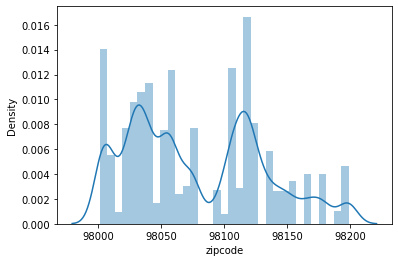

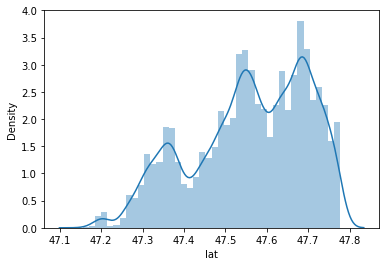

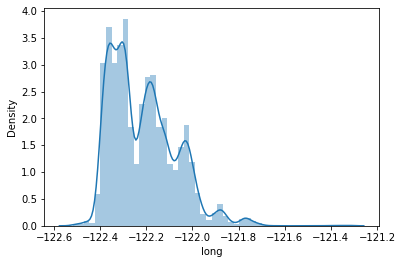

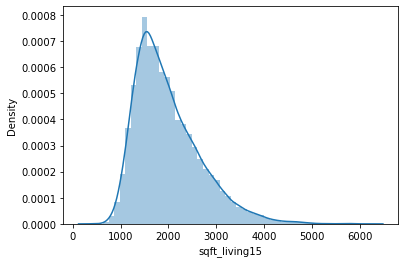

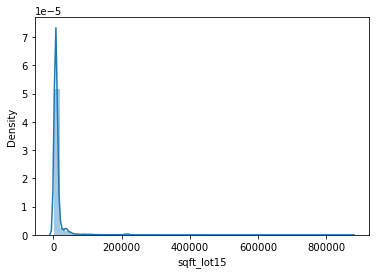

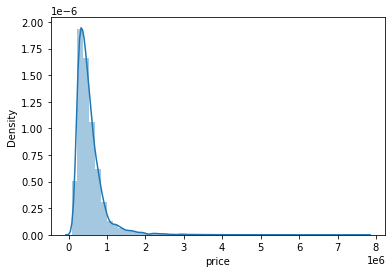

In [24]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

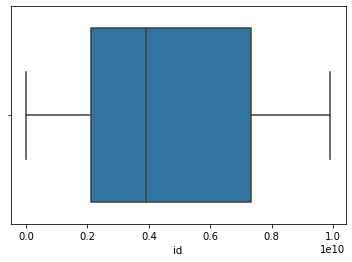

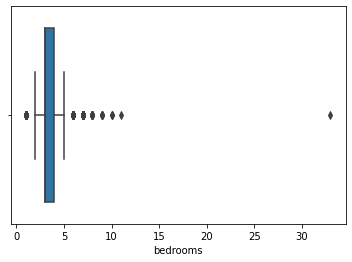

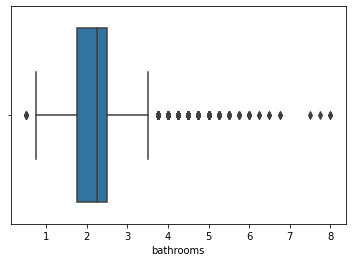

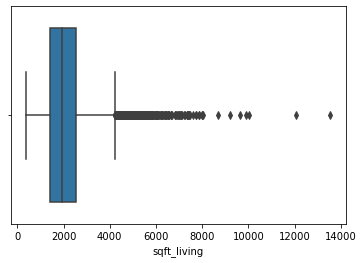

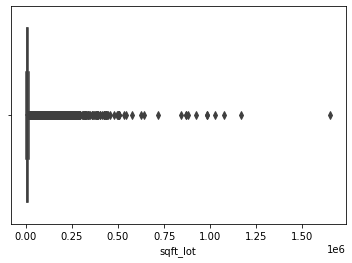

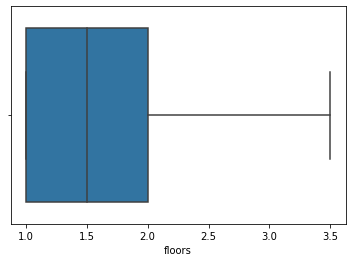

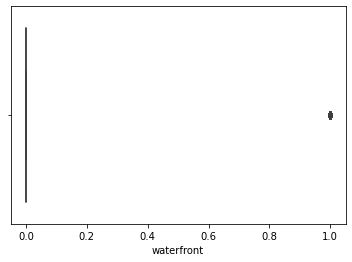

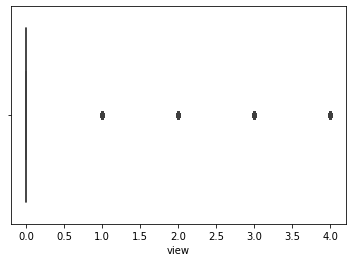

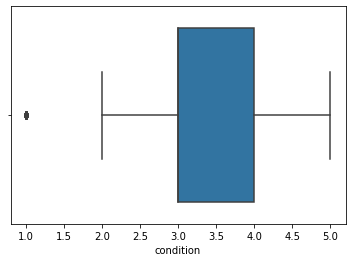

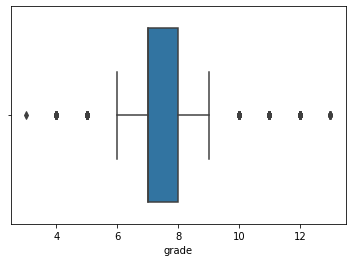

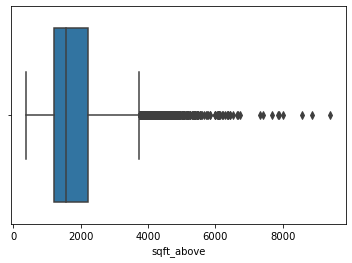

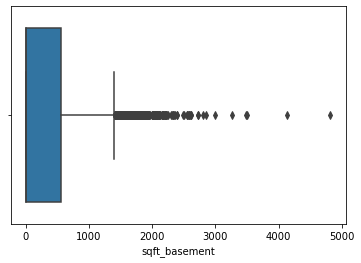

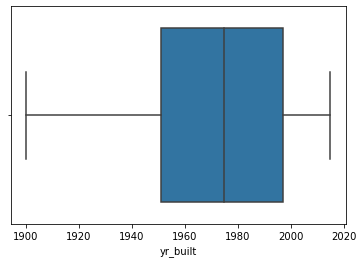

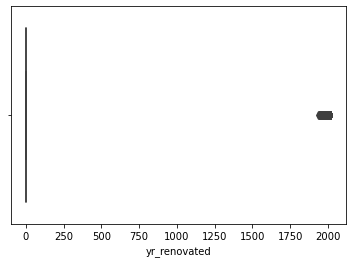

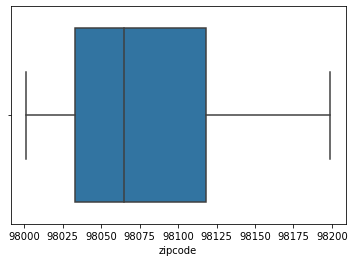

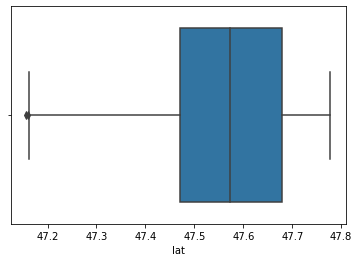

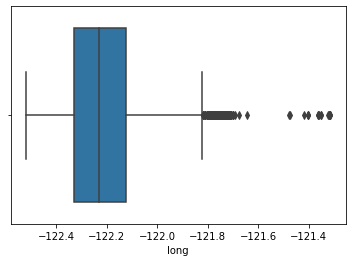

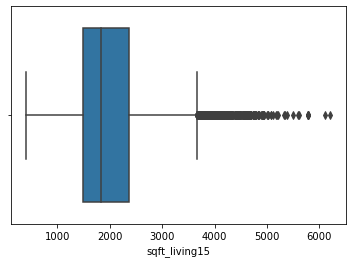

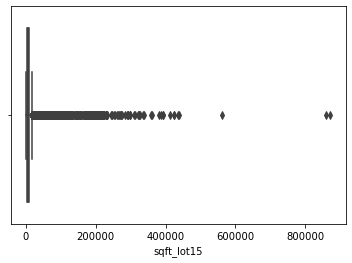

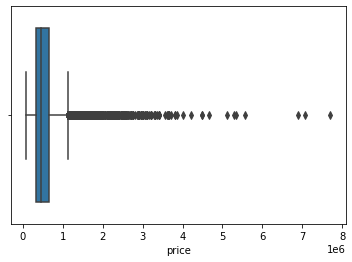

In [25]:
for column in df.select_dtypes(np.number).columns:
    sns.boxplot(df[column])
    plt.show()

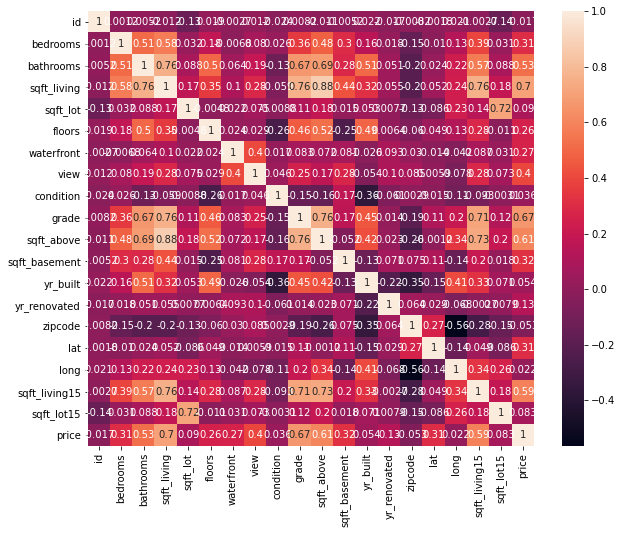

In [72]:
corr_matrix=df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## 4. Creating Linear Regression Models

In [101]:
def model(df, col):
    X = df[col]
    y = df['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    return r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

In [102]:
model(df, ['sqft_above'])

(0.37788708294968454, 188770.67640996436, 284621.2041798548)

In [103]:
model(df, ['sqft_above', 'yr_built'])

(0.420545150206194, 183527.40506264233, 274689.7432264636)

In [114]:
df1 = df.drop(['date', 'lat', 'long'], axis=1)

In [116]:
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [123]:
df2 = df1.copy()

df2 = remove_outliers(df1, threshold=1.25, in_columns=['price','bedrooms','sqft_above'])
df2.shape

(18927, 18)

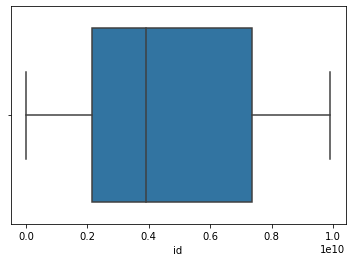

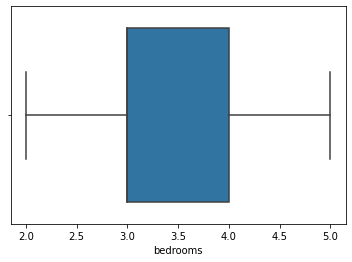

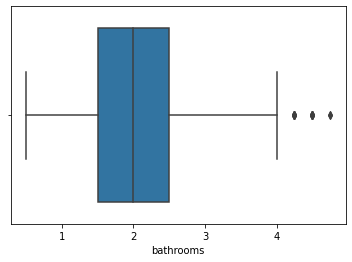

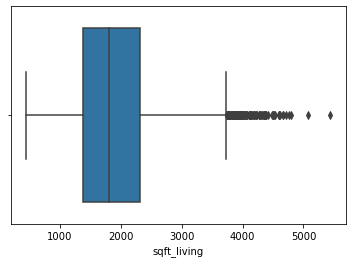

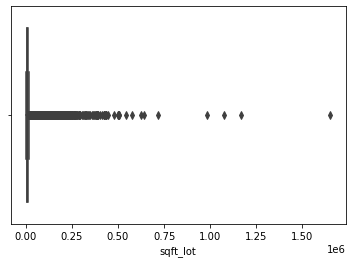

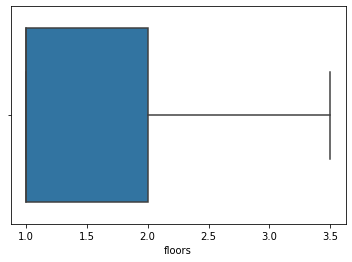

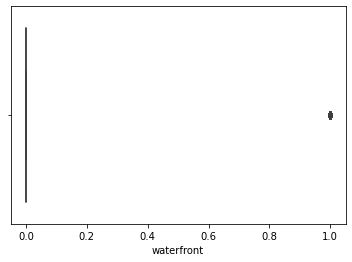

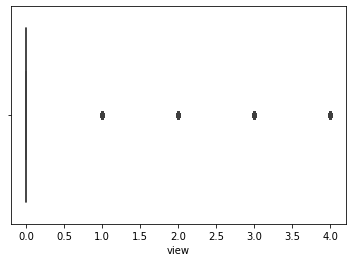

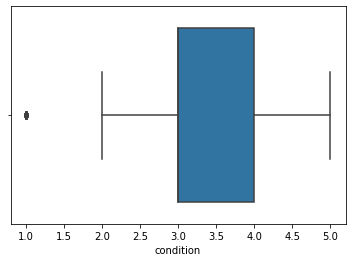

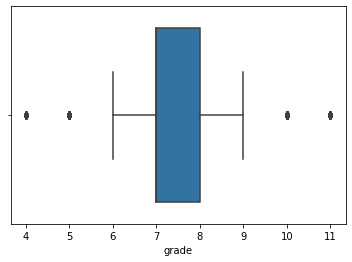

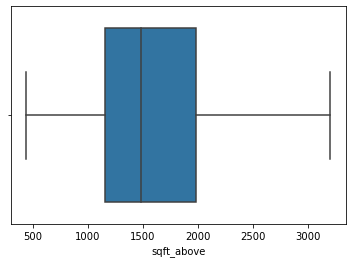

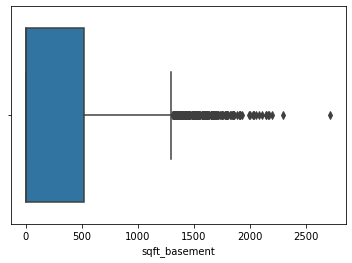

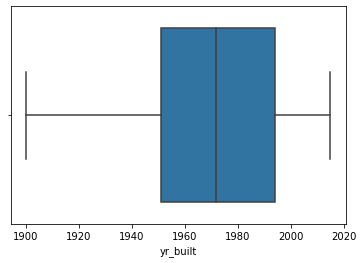

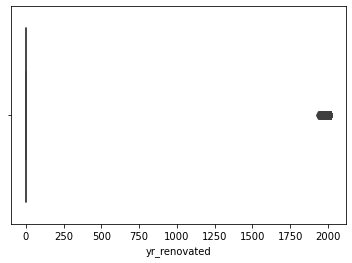

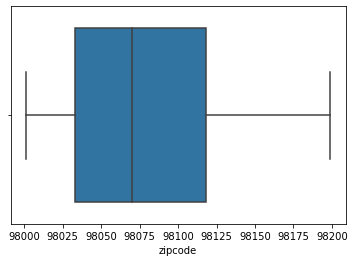

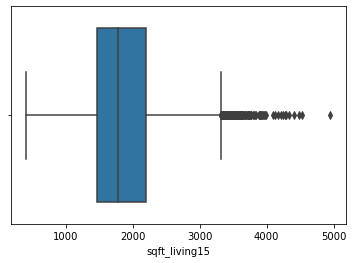

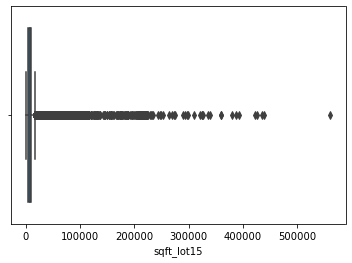

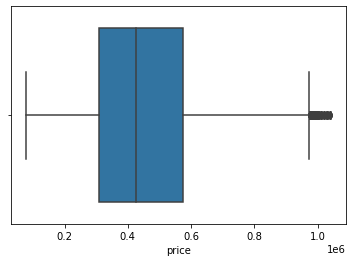

In [124]:
for column in df2.select_dtypes(np.number).columns:
    sns.boxplot(df2[column])
    plt.show()

In [128]:
model(df2, ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'])

(0.5428202875946987, 101135.21307905638, 128716.095440518)

In [129]:
df2.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

In [130]:
df2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18927 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18927 non-null  int64  
 1   bedrooms       18927 non-null  int64  
 2   bathrooms      18927 non-null  float64
 3   sqft_living    18927 non-null  int64  
 4   sqft_lot       18927 non-null  int64  
 5   floors         18927 non-null  float64
 6   waterfront     18927 non-null  int64  
 7   view           18927 non-null  int64  
 8   condition      18927 non-null  int64  
 9   grade          18927 non-null  int64  
 10  sqft_above     18927 non-null  int64  
 11  sqft_basement  18927 non-null  int64  
 12  yr_built       18927 non-null  int64  
 13  yr_renovated   18927 non-null  int64  
 14  zipcode        18927 non-null  int64  
 15  sqft_living15  18927 non-null  int64  
 16  sqft_lot15     18927 non-null  int64  
 17  price          18927 non-null  int64  
dtypes: flo

In [131]:
def boxcox_transform(df):
    _ci = {column: None for column in cols}
    for column in cols:
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [134]:
cols = ['price','sqft_living','sqft_living15','sqft_lot15']

In [135]:
df_t, _ci = boxcox_transform(df2)

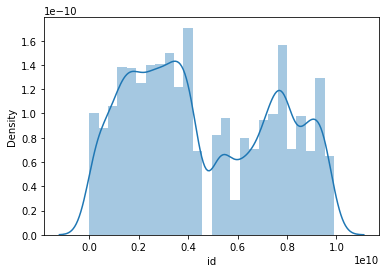

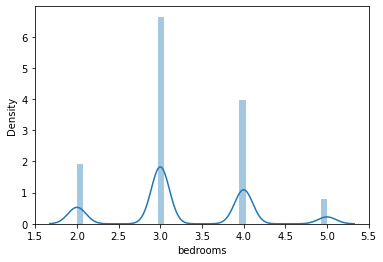

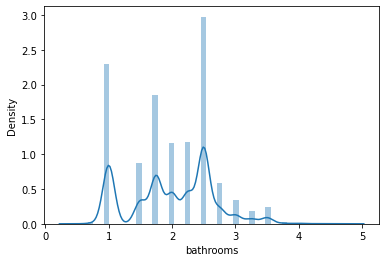

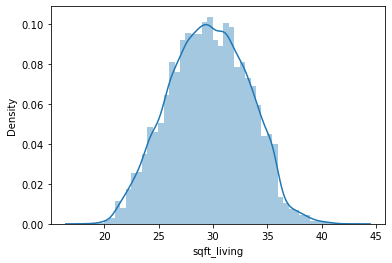

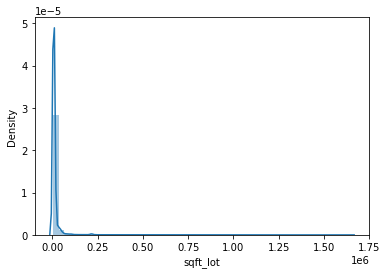

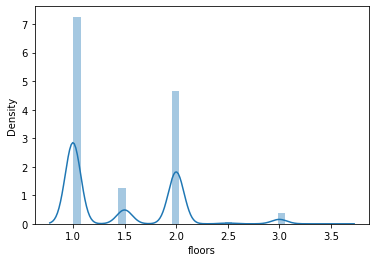

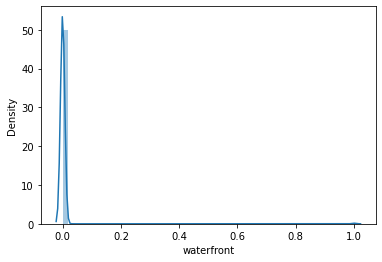

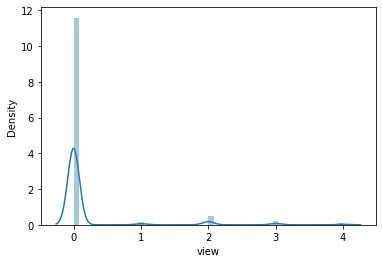

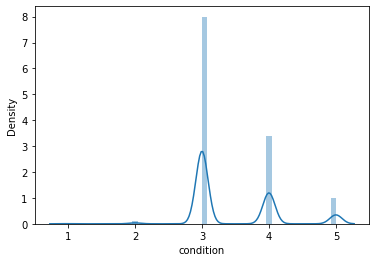

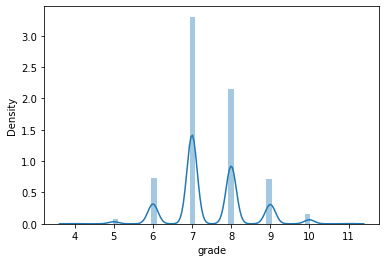

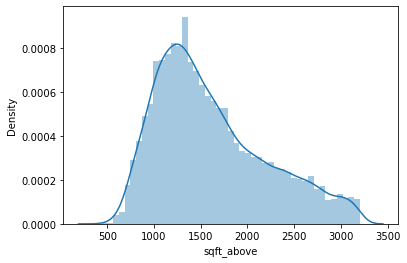

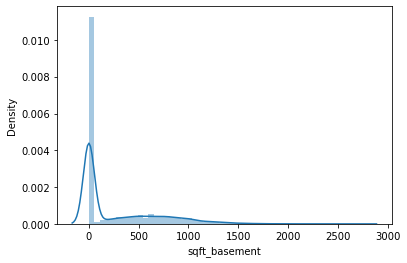

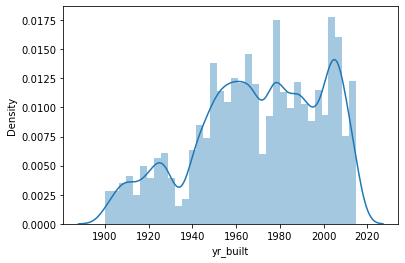

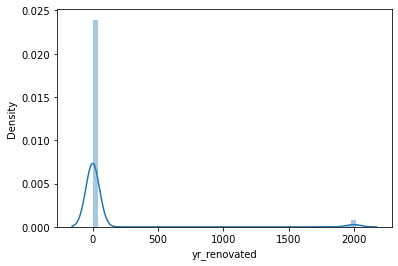

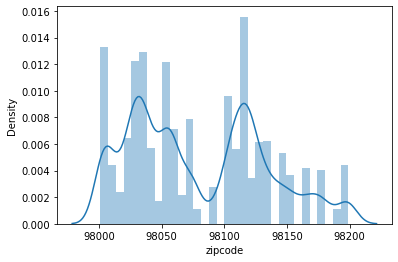

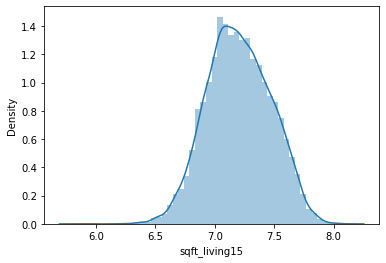

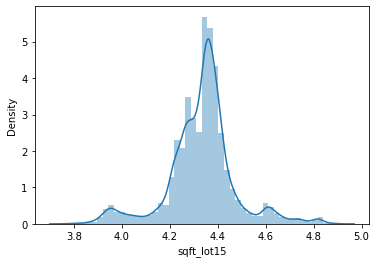

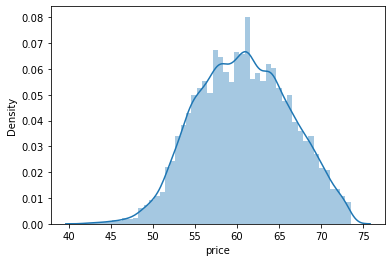

In [141]:
for column in df2.select_dtypes(np.number).columns:
    sns.distplot(df2[column])
    plt.show()

In [145]:
model(df2, ['sqft_living', 'grade', 'yr_built', 'sqft_lot15'])

(0.5090716491922003, 3.1450626105846493, 3.8995631639682533)